# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [28]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [29]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX")

## Load Data

In [30]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [31]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!

sfo_data.housing_units.groupby('year').mean()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

384242
372560
4206.0007132667015


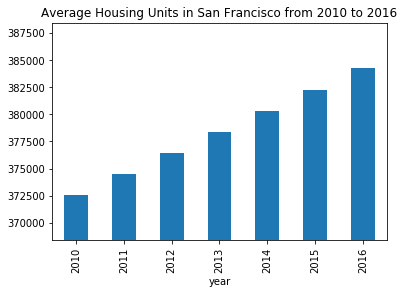

In [32]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!


max_housing_unit_avg = sfo_data.housing_units.groupby('year').mean().max()
print(max_housing_unit_avg)

min_housing_unit_avg = sfo_data.housing_units.groupby('year').mean().min()
print(min_housing_unit_avg)

std_housing_units = sfo_data.housing_units.groupby('year').mean().std()
print(std_housing_units)

sfo_data.housing_units.groupby('year').mean().plot.bar(ylim=(min_housing_unit_avg-std_housing_units,max_housing_unit_avg + std_housing_units), title ="Average Housing Units in San Francisco from 2010 to 2016")

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!



- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [33]:
# Calculate the average gross rent and average sale price per square foot
# YOUR CODE HERE!

#average gross rent
sfo_data.gross_rent.groupby('year').mean()

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64

In [34]:
#average sale price per square foot
sfo_data.sale_price_sqr_foot.groupby('year').mean()

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
2015    632.540352
2016    697.643709
Name: sale_price_sqr_foot, dtype: float64

In [35]:
#print out averages with both columns selected
print((sfo_data[['sale_price_sqr_foot', 'gross_rent']]).groupby('year').mean())

      sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390


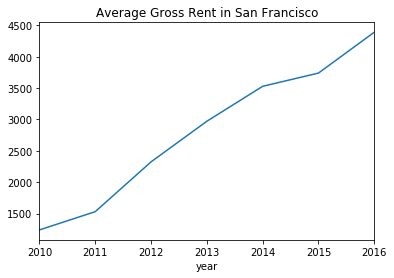

In [36]:
# Plot the Average Gross Rent per Year as a Line Chart 
# YOUR CODE HERE!

sfo_data.gross_rent.groupby('year').mean().plot(title = "Average Gross Rent in San Francisco")

### Average Sales Price per Year

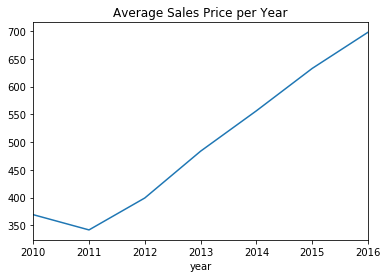

In [37]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!

sfo_data.sale_price_sqr_foot.groupby('year').mean().plot(title = "Average Sales Price per Year")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [38]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!

sfo_data[['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent']].groupby(['year','neighborhood']).mean()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                          
2010 Alamo Square                     291.182945         372560        1239
     Anza Vista                       267.932583         372560        1239
     Bayview                          170.098665         372560        1239
     Buena Vista Park                 347.394919         372560        1239
     Central Richmond                 319.027623         372560        1239
...                                          ...            ...         ...
2016 Telegraph Hill                   903.049771         384242        4390
     Twin Peaks                       970.085470         384242        4390
     Van Ness/ Civic Center           552.602567         384242        4390
     Visitacion Valley                328.319007         384242        4390
     Westwood Park                    631.195426         384242        4390

[397 rows x 3 columns]

In [39]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

sfo_data[['neighborhood', 'sale_price_sqr_foot']].groupby(['year','neighborhood']).mean().hvplot.line()


:Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [40]:
# Getting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

sfo_data_averages=sfo_data[['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent']].groupby('neighborhood').mean()
sfo_data_averages.sort_values(['sale_price_sqr_foot'], ascending=False, inplace=True)
top_ten_expensive_neighborhoods=sfo_data_averages.head(10)

top_ten_expensive_neighborhoods

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


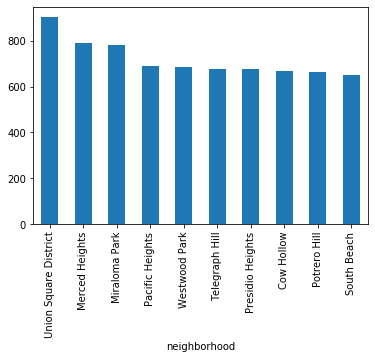

In [41]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

top_ten_expensive_neighborhoods['sale_price_sqr_foot'].plot.bar('Neighborhood',1000)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [42]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

px.parallel_coordinates(neighborhood,sale_price_sqr_foot)

NameError: name 'neighborhood' is not defined

In [ ]:
# Parallel Categories Plot
# YOUR CODE HERE!

px.parallel_categories(
    sfo_data_averages,
    dimensions=["neighborhoods", "sale_price_sqr_foot", "gross_rent", "housing_units"],
    color=year,
    color_continuous_scale=ps.colors.sequential.Inferno,
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [46]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.tail()

,Neighborhood,Lat,Lon
68,West Portal,37.74026,-122.463880
69,Western Addition,37.79298,-122.435790
70,Westwood Highlands,37.73470,-122.456854
71,Westwood Park,37.73415,-122.457000
72,Yerba Buena,37.79298,-122.396360


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [47]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

sfo_data_averages.sort_values(['sale_price_sqr_foot'], ascending=False, inplace=True)
sfo_data_averages.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000


In [53]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

df_neighborhood_locations.reset_index(drop=True, inplace=True)
sfo_data_averages.reset_index(drop=True, inplace=True)
print(df_neighborhood_locations)
print(sfo_data_averages)

          Neighborhood        Lat         Lon
0         Alamo Square  37.791012 -122.402100
1           Anza Vista  37.779598 -122.443451
2              Bayview  37.734670 -122.401060
3      Bayview Heights  37.728740 -122.410980
4       Bernal Heights  37.728630 -122.443050
..                 ...        ...         ...
68         West Portal  37.740260 -122.463880
69    Western Addition  37.792980 -122.435790
70  Westwood Highlands  37.734700 -122.456854
71       Westwood Park  37.734150 -122.457000
72         Yerba Buena  37.792980 -122.396360

[73 rows x 3 columns]
    sale_price_sqr_foot  housing_units   gross_rent
0            903.993258      377427.50  2555.166667
1            788.844818      380348.00  3414.000000
2            779.810842      375967.25  2155.250000
3            689.555817      378401.00  2817.285714
4            687.087575      382295.00  3959.000000
..                  ...            ...          ...
68           301.466180      381321.50  3657.000000
69       

In [55]:


pd.concat([sfo_data_averages,df_neighborhood_locations], sort=True, axis=1).head()

,sale_price_sqr_foot,housing_units,gross_rent,Neighborhood,Lat,Lon
0,903.993258,377427.50,2555.166667,Alamo Square,37.791012,-122.402100
1,788.844818,380348.00,3414.000000,Anza Vista,37.779598,-122.443451
2,779.810842,375967.25,2155.250000,Bayview,37.734670,-122.401060
3,689.555817,378401.00,2817.285714,Bayview Heights,37.728740,-122.410980
4,687.087575,382295.00,3959.000000,Bernal Heights,37.728630,-122.443050


In [ ]:
### Mapbox Visualization

Plot the average values per neighborhood with a plotly express scatter_mapbox visualization.

In [80]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

